In [6]:
pip install TextBlob

In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Replace 'your_file_path.xlsx' with the actual file path
file_path = r"C:\Users\yadav\Videos\youtube\sound\Data Analyst - Test Data.xlsx"
data = pd.read_excel(file_path)

# Preview the data structure
print(data.head())


                                              Review       date     Location
0  I was very impressed with the resort.\n Great ... 2019-08-20    Sebastian
1  The rooms were nice the outside needs work als... 2019-08-20  Los Angeles
2  Great location! I have stayed at this hotel on... 2019-08-20      Georgia
3  The hotel was adequate for my stay. The strips... 2019-08-20          NaN
4  Great location, room was large and spacious. P... 2019-08-19  Palm Harbor


In [9]:
data = data.dropna(subset=['Review'])  # Drop rows with missing reviews


In [10]:
data = data.dropna(subset=['Location'])  # Drop rows with missing reviews


In [11]:
data.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
10,Very clean and friendly and I love the locatio...,2019-08-19,California


In [12]:
# Step 1: Data Cleaning and Sentiment Labeling
# Assuming the reviews are in a column named 'Review'
def classify_sentiment(review):
    sentiment_score = TextBlob(review).sentiment.polarity
    if sentiment_score > 0.3:
        return 'Happy'
    elif sentiment_score < -0.3:
        return 'Unhappy'
    else:
        return 'Moderate'

data['Sentiment'] = data['Review'].apply(classify_sentiment)



In [13]:
data

,Review,date,Location,Sentiment
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,Happy
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,Moderate
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,Moderate
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,Happy
10,Very clean and friendly and I love the locatio...,2019-08-19,California,Moderate
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,Moderate
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,Moderate
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,Moderate
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,Moderate


In [14]:
# Group by location and sentiment
location_sentiment = data.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)

# Calculate total reviews and unhappy percentages by location
data['Total Reviews'] = data.groupby('Location')['Review'].transform('count')
data['Unhappy Percentage'] = data.groupby('Location')['Sentiment'].apply(
    lambda x: (x == 'Unhappy').sum() / len(x) * 100
)


In [15]:
data 

,Review,date,Location,Sentiment,Total Reviews,Unhappy Percentage
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,Happy,1,NaN
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,Moderate,10,NaN
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,Moderate,3,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,Happy,1,NaN
10,Very clean and friendly and I love the locatio...,2019-08-19,California,Moderate,19,NaN
...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,Moderate,116,NaN
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,Moderate,116,NaN
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,Moderate,116,NaN
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,Moderate,116,NaN


In [16]:
top_unhappy_locations = data.groupby('Location')['Unhappy Percentage'].max().sort_values(ascending=False).head(10)


In [17]:
top_unhappy_locations

Location
Stockholm                 0.0
2186                      NaN
Aalborg, Denmark          NaN
Abbotsford BC             NaN
Agde                      NaN
Aguadilla, P.R.           NaN
Aguascalientes, Mexico    NaN
Alabama                   NaN
Albany NY                 NaN
Albany, NY                NaN
Name: Unhappy Percentage, dtype: float64

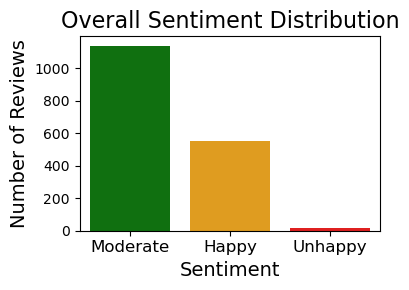

In [18]:
# Step 1: Count the number of reviews for each sentiment category
sentiment_counts = data['Sentiment'].value_counts()

# Step 2: Plot a bar chart for overall sentiment distribution
plt.figure(figsize=(4,3))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'orange', 'red'])

# Step 3: Customize the plot
plt.title('Overall Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()

# Step 4: Show the plot
plt.show()


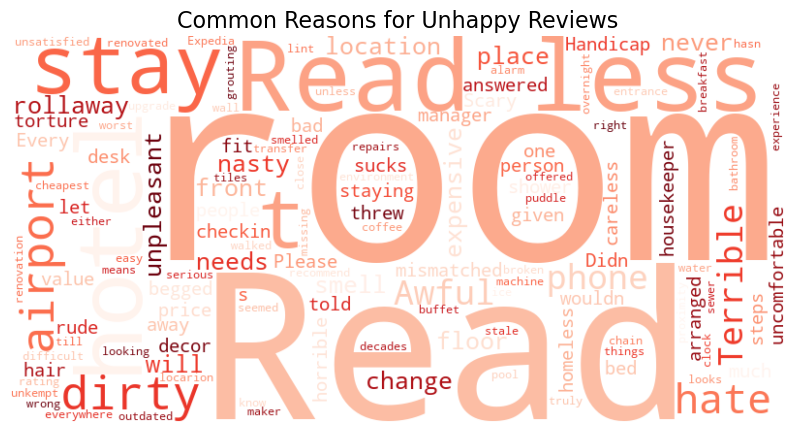

Top 20 Reasons for Unhappy Reviews:
the: 12
Read: 12
was: 12
I: 9
room: 7
and: 7
more: 6
less: 6
in: 5
that: 5
a: 5
to: 5
it: 4
·the: 4
airport: 4
like: 3
for: 3
hate: 3
with: 3
you: 3

Top Locations with Most Unhappy Reviews:
Location
United States of America    3
United Kingdom              2
China                       1
Italy                       1
Kuwait                      1
Los Angeles CA              1
Modesto ca                  1
NYC                         1
Orlando                     1
Pikeville, Ky               1
dtype: int64


In [35]:
# Step 1: Filter "Unhappy" reviews
unhappy_reviews = data[data['Sentiment'] == 'Unhappy']

# Step 2: Combine all "Unhappy" reviews into a single text
all_unhappy_text = ' '.join(unhappy_reviews['Review'].astype(str))

# Step 3: Create a WordCloud for common reasons
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(all_unhappy_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Reasons for Unhappy Reviews', fontsize=16)
plt.show()

# Step 4: Find most common words (Optional)
# Tokenize the text and count word frequencies
words = all_unhappy_text.split()
common_words = Counter(words).most_common(20)

# Display top 20 most frequent words
print("Top 20 Reasons for Unhappy Reviews:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Step 5: Group "Unhappy" reviews by location or category for deeper insights
unhappy_by_location = unhappy_reviews.groupby('Location').size().sort_values(ascending=False)

# Display the top locations with the highest number of unhappy reviews
print("\nTop Locations with Most Unhappy Reviews:")
print(unhappy_by_location.head(10))


In [33]:
print(data['Sentiment'].value_counts())


Moderate    1140
Happy        551
Unhappy       14
Name: Sentiment, dtype: int64


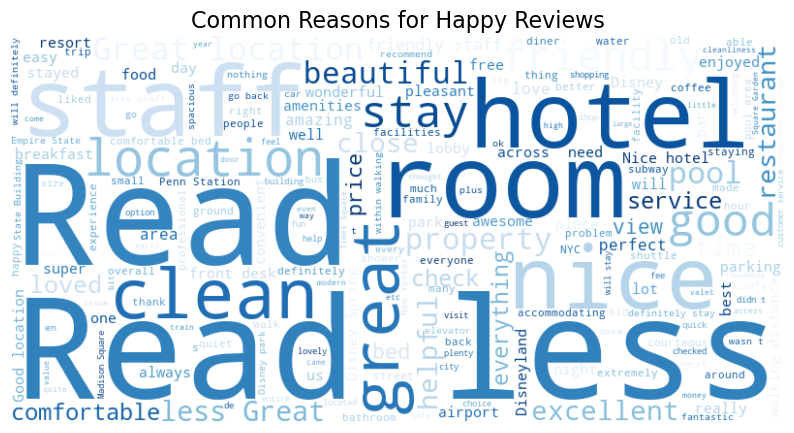

Top 20 Reasons for Happy Reviews:
Read: 986
and: 633
the: 610
more: 509
less: 493
was: 462
to: 345
a: 246
The: 209
in: 176
very: 168
is: 158
I: 142
hotel: 139
of: 137
great: 128
staff: 126
for: 125
room: 114
were: 105


In [38]:
# Step 1: Filter "Happy" reviews
happy_reviews = data[data['Sentiment'] == 'Happy']

# Step 2: Check if there are any valid "Happy" reviews
if happy_reviews.shape[0] == 0:
    print("No happy reviews found.")
else:
    # Step 2a: Remove rows with missing or empty reviews
    happy_reviews = happy_reviews.dropna(subset=['Review'])
    happy_reviews = happy_reviews[happy_reviews['Review'].str.strip() != '']  # Remove empty reviews

    # Step 3: Combine all "Happy" reviews into a single text
    all_happy_text = ' '.join(happy_reviews['Review'].astype(str))

    # Step 4: Generate WordCloud only if there is content
    if len(all_happy_text.strip()) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(all_happy_text)

        # Plot the WordCloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Common Reasons for Happy Reviews', fontsize=16)
        plt.show()
    else:
        print("No content available for generating WordCloud.")

    # Step 5: Find most common words
    words = all_happy_text.split()
    common_words = Counter(words).most_common(20)

    # Display top 20 most frequent words
    print("Top 20 Reasons for Happy Reviews:")
    for word, freq in common_words:
        print(f"{word}: {freq}")

    # Step 6: Group "Happy" reviews by location or category for deeper insights
    happy_by_location = happy_reviews.groupby('Location').size().sort_values(ascending=False)




In [41]:
print("\nTop Locations with Most happy Reviews:")

happy_by_location.head(10)


Top Locations with Most happy Reviews:


Location
United States of America    43
New York                     9
San Jose                     8
Canada                       6
Toronto                      5
California                   5
Orlando                      5
Boston                       4
United Kingdom               4
Washington, DC               4
dtype: int64

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Step 1: Calculate sentiment scores for all reviews
data['neg'] = data['Review'].apply(lambda x: analyzer.polarity_scores(str(x))['neg'])
data['pos'] = data['Review'].apply(lambda x: analyzer.polarity_scores(str(x))['pos'])

# Step 2: Filter for happy and unhappy reviews
happy_reviews = data[data['Sentiment'] == 'Happy']
unhappy_reviews = data[data['Sentiment'] == 'Unhappy']

# Step 3: Get the top 10 happiest reviews
top_happy_reviews = happy_reviews.sort_values("pos", ascending=False)[["Review", "pos"]].head(10)

# Step 4: Get the top 10 most unhappy reviews
top_unhappy_reviews = unhappy_reviews.sort_values("neg", ascending=False)[["Review", "neg"]].head(10)

# Step 5: Print the results
print("Top 10 Happiest Reviews:")
top_happy_reviews.head(10)




Top 10 Happiest Reviews:


,Review,pos
6333,"·great rooms, great service, great value.",0.779
6410,·very friendly and helpful staff,0.667
2959,Great location. Nice staff. Clean. Comfortable...,0.648
273,Great check-in staff. Very helpful. Beautiful ...,0.645
2410,"Great location , beautiful, friendly. This pro...",0.633
940,"Great place to stay! Friendly, courteous staff...",0.628
4945,Nice remodel. Looking good. Clean and comforta...,0.626
1153,Great place great area great staff paid parkin...,0.618
60,"Friendly staff, clean property, secure parking...",0.613
5089,"Beautiful property, had a great time, clean an...",0.609


In [22]:
print("\nTop 10 Most Unhappy Reviews:")
top_unhappy_reviews.head(10)


Top 10 Most Unhappy Reviews:


,Review,neg
6366,·pool was dirty,0.592
1915,Handicap room this sucks I hate the shower I h...,0.560
2879,Very rude manager and careless housekeeper.\n ...,0.452
6399,·close to the airport\n \n \n \n \n ·dirty bat...,0.325
1169,Didn’t like much. Awful mismatched decor. Scar...,0.307
6367,·location.\n \n \n \n \n ·the coffee maker in ...,0.262
4254,Very unpleasant experience room looks like it ...,0.242
2413,I was told at checkin that the rollaway bed th...,0.211
3064,This is a terrible place to stay. My room was ...,0.198
6371,·proximity to airport only\n \n \n \n \n ·very...,0.180


In [23]:
print(top_unhappy_reviews.to_string(index=False))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Review   neg
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ·pool was dirty 0.592
    

In [42]:
location_sentiment = data.groupby('Location').agg(
    total_reviews=('Review', 'count'),
    total_pos=('pos', 'sum'),
    total_neg=('neg', 'sum')
)

# Step 3: Calculate per-review scores
location_sentiment['avg_pos_per_review'] = location_sentiment['total_pos'] / location_sentiment['total_reviews']
location_sentiment['avg_neg_per_review'] = location_sentiment['total_neg'] / location_sentiment['total_reviews']

# Step 4: Sort to identify happiest and most unhappy locations
happiest_locations = location_sentiment.sort_values('avg_pos_per_review', ascending=False).head(10)
unhappiest_locations = location_sentiment.sort_values('avg_neg_per_review', ascending=False).head(10)

# Display the results
print("Top 10 Happiest Locations (Per Capita):")
print(happiest_locations[['avg_pos_per_review', 'total_reviews']])

print("\nTop 10 Unhappiest Locations (Per Capita):")
print(unhappiest_locations[['avg_neg_per_review', 'total_reviews']])


Top 10 Happiest Locations (Per Capita):
                         avg_pos_per_review  total_reviews
Location                                                  
Middletown, md                        0.648              1
Nova                                  0.633              1
Waterford Michigan                    0.609              1
San Diego Harbor Island               0.608              1
Md                                    0.605              1
Edwardsville, Ial                     0.602              1
Manchester                            0.598              1
Fairfax Station, VA                   0.591              1
Ct                                    0.588              1
melbourne, australia                  0.588              1

Top 10 Unhappiest Locations (Per Capita):
                      avg_neg_per_review  total_reviews
Location                                               
Modesto ca                         0.560              1
houston, us                        0.452 

In [ ]:
now group 